<a href="https://colab.research.google.com/github/BragaGiu/challenge-alura-store/blob/main/AluraStore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalação das bibliotecas que serão usadas
!pip install pandas
!pip install matplotlib

### Importação dos dados



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
# Valor do faturamento das lojas
faturamento_1 = loja["Preço"].sum()
faturamento_2 = loja2["Preço"].sum()
faturamento_3 = loja3["Preço"].sum()
faturamento_4 = loja4["Preço"].sum()

# Lista de lojas
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
faturamento_lojas = [faturamento_1, faturamento_2, faturamento_3, faturamento_4]

# Exibição do faturamento por loja
for i in range (0,4):
    print(f"{lojas[i]} = Faturamento de R${faturamento_lojas[i]:,.2f}")


Loja 1 = Faturamento de R$1,534,509.12
Loja 2 = Faturamento de R$1,488,459.06
Loja 3 = Faturamento de R$1,464,025.03
Loja 4 = Faturamento de R$1,384,497.58


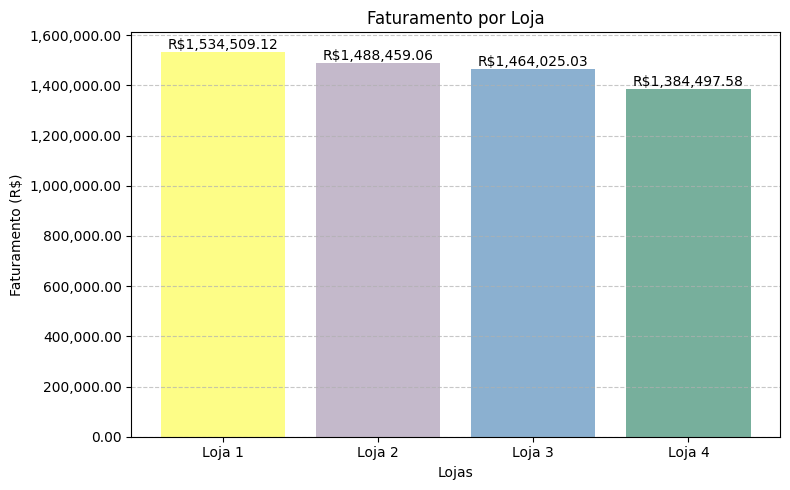

In [ ]:
# Visualização dos faturamento com gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(lojas, faturamento_lojas, color=["#FDFD87", "#C4B9CB", "#8BB0D0", "#77AF9C"])
for i, valor in enumerate(faturamento_lojas):
  plt.text(i, valor + (valor * 0), f'R${valor:,.2f}', ha='center', va='bottom', fontsize=10)

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.2f}'))

plt.title("Faturamento por Loja")
plt.xlabel("Lojas")
plt.ylabel("Faturamento (R$)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [ ]:
def contar_vendas_por_categoria(loja, categorias):
    contagem = loja["Categoria do Produto"].value_counts().to_dict()
    return {categoria: contagem.get(categoria, 0) for categoria in categorias}

categorias_existentes = ['moveis', 'eletronicos', 'brinquedos', 'eletrodomesticos', 'esporte e lazer', 'instrumentos musicais', 'livros', 'utilidades domesticas']

vendas_loja1 = contar_vendas_por_categoria(loja, categorias_existentes)
vendas_loja2 = contar_vendas_por_categoria(loja2, categorias_existentes)
vendas_loja3 = contar_vendas_por_categoria(loja3, categorias_existentes)
vendas_loja4 = contar_vendas_por_categoria(loja4, categorias_existentes)

vendas_por_loja = [vendas_loja1, vendas_loja2, vendas_loja3, vendas_loja4]
nomes_lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

for i in range(4):
    print(f"\n{nomes_lojas[i]} - Vendas por Categoria:")
    for categoria, quantidade in vendas_por_loja[i].items():
        print(f"  {categoria}: {quantidade} vendas")


Loja 1 - Vendas por Categoria:
  moveis: 465 vendas
  eletronicos: 448 vendas
  brinquedos: 324 vendas
  eletrodomesticos: 312 vendas
  esporte e lazer: 284 vendas
  instrumentos musicais: 182 vendas
  livros: 173 vendas
  utilidades domesticas: 171 vendas

Loja 2 - Vendas por Categoria:
  moveis: 442 vendas
  eletronicos: 422 vendas
  brinquedos: 313 vendas
  eletrodomesticos: 305 vendas
  esporte e lazer: 275 vendas
  instrumentos musicais: 224 vendas
  livros: 197 vendas
  utilidades domesticas: 181 vendas

Loja 3 - Vendas por Categoria:
  moveis: 499 vendas
  eletronicos: 451 vendas
  brinquedos: 315 vendas
  eletrodomesticos: 278 vendas
  esporte e lazer: 277 vendas
  instrumentos musicais: 177 vendas
  livros: 185 vendas
  utilidades domesticas: 177 vendas

Loja 4 - Vendas por Categoria:
  moveis: 480 vendas
  eletronicos: 451 vendas
  brinquedos: 338 vendas
  eletrodomesticos: 254 vendas
  esporte e lazer: 277 vendas
  instrumentos musicais: 170 vendas
  livros: 187 vendas
  ut

<Figure size 1200x600 with 0 Axes>

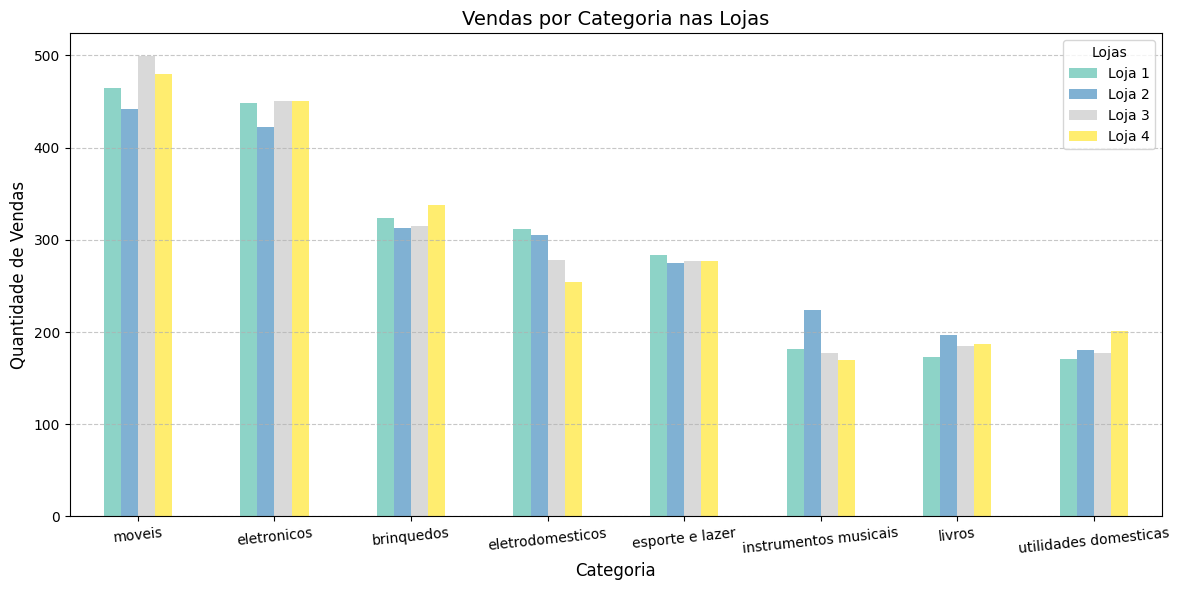

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_vendas = pd.DataFrame(vendas_por_loja, index=nomes_lojas)
df_vendas = df_vendas.T

plt.figure(figsize=(12, 6))
df_vendas.plot(kind='bar', figsize=(12, 6), colormap='Set3')

plt.title("Vendas por Categoria nas Lojas", fontsize=14)
plt.xlabel("Categoria", fontsize=12)
plt.ylabel("Quantidade de Vendas", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Lojas")
plt.xticks(x, categorias_existentes, rotation=6)
plt.tight_layout()

plt.show()


# 3. Média de Avaliação das Lojas

In [ ]:
lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

medias_avaliacao = [df["Avaliação da compra"].mean() for df in lojas]

for nome, media in zip(nomes_lojas, medias_avaliacao):
    print(f"{nome}: Média de Avaliação = {media:.2f}")


Loja 1: Média de Avaliação = 3.98
Loja 2: Média de Avaliação = 4.04
Loja 3: Média de Avaliação = 4.05
Loja 4: Média de Avaliação = 4.00


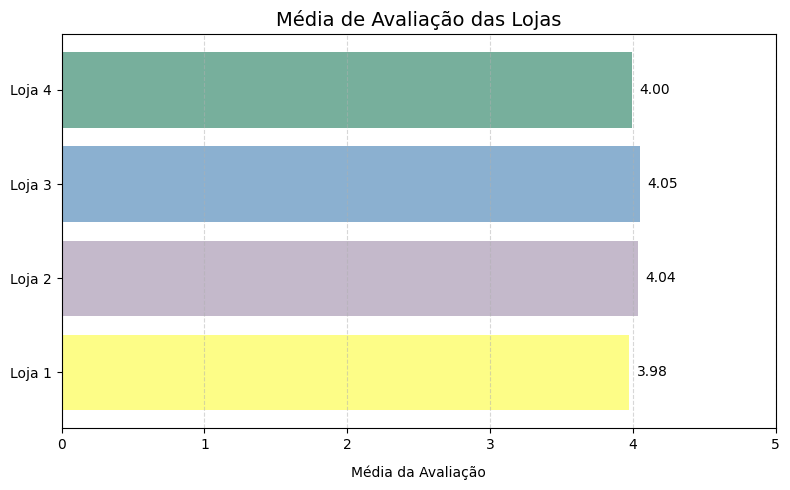

In [ ]:
import matplotlib.pyplot as plt

nomes_lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
medias_avaliacao = [df["Avaliação da compra"].mean() for df in lojas]
cores = ["#FDFD87", "#C4B9CB", "#8BB0D0", "#77AF9C"]

plt.figure(figsize=(8, 5))
barras = plt.barh(nomes_lojas, medias_avaliacao, color=cores)

for barra in barras:
    largura = barra.get_width()
    plt.text(largura + 0.05, barra.get_y() + barra.get_height()/2,
             f"{largura:.2f}", va='center', fontsize=10)

plt.xlim(0, 5)  # Avaliação de 0 a 5
plt.xlabel("Média da Avaliação", labelpad=10)
plt.title("Média de Avaliação das Lojas", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



# 4. Produtos Mais e Menos Vendidos

In [ ]:
# Dados das vendas por produto para cada loja
vendas_por_produto = {
    "Loja 1": loja["Produto"].value_counts(),
    "Loja 2": loja2["Produto"].value_counts(),
    "Loja 3": loja3["Produto"].value_counts(),
    "Loja 4": loja4["Produto"].value_counts()
}

# Iterando sobre cada loja
for nome_loja, vendas in vendas_por_produto.items():
    print(f"{nome_loja}")

    if not vendas.empty:
        mais_vendido = vendas.idxmax()
        quantidade_mais_vendido = vendas.max()
        menos_vendido = vendas.idxmin()
        quantidade_menos_vendido = vendas.min()

        print(f"Produto mais vendido: {mais_vendido} - {quantidade_mais_vendido} vendas")
        print(f"Produto menos vendido: {menos_vendido} - {quantidade_menos_vendido} venda(s)")
    else:
        print("Nenhuma venda registrada para esta loja.")

    print()



Loja 1
Produto mais vendido: Micro-ondas - 60 vendas
Produto menos vendido: Headset - 33 venda(s)

Loja 2
Produto mais vendido: Iniciando em programação - 65 vendas
Produto menos vendido: Jogo de tabuleiro - 32 venda(s)

Loja 3
Produto mais vendido: Kit banquetas - 57 vendas
Produto menos vendido: Blocos de montar - 35 venda(s)

Loja 4
Produto mais vendido: Cama box - 62 vendas
Produto menos vendido: Guitarra - 33 venda(s)



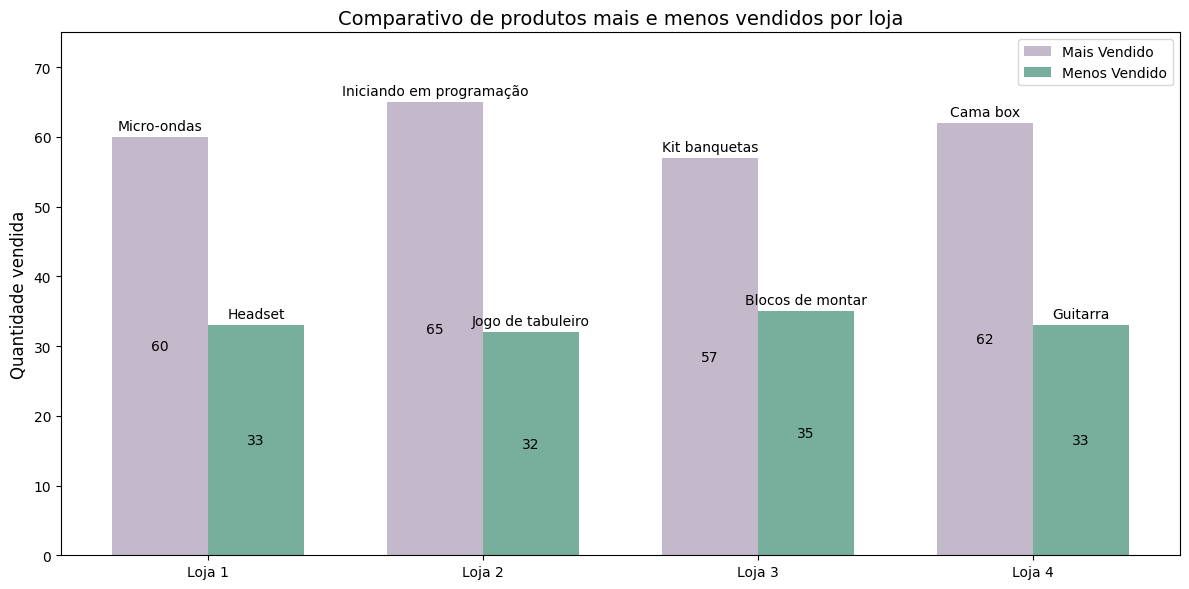

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(lojas))
fig, ax = plt.subplots(figsize=(12, 6))
plt.ylim(0, max(qtd_mais_vendidos + qtd_menos_vendidos) + 10)

barras_mais = ax.bar(x - 0.35/2, qtd_mais_vendidos, 0.35, label='Mais Vendido', color="#C4B9CB")
barras_menos = ax.bar(x + 0.35/2, qtd_menos_vendidos, 0.35, label='Menos Vendido', color='#77AF9C')

ax.bar_label(barras_mais, labels=qtd_mais_vendidos, fontsize=10, label_type='center', color='black')
ax.bar_label(barras_menos, labels=qtd_menos_vendidos, fontsize=10, label_type='center', color='black')

for i, barra in enumerate(barras_mais):
    ax.text(barra.get_x() + barra.get_width()/2, barra.get_height() + 1,
            mais_vendidos[i], fontsize=10, color='black', ha='center')

for i, barra in enumerate(barras_menos):
    ax.text(barra.get_x() + barra.get_width()/2, barra.get_height() + 1,
            menos_vendidos[i], fontsize=10, color='black', ha='center')

ax.set_title("Comparativo de produtos mais e menos vendidos por loja", fontsize=14)
ax.set_ylabel("Quantidade vendida", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(lojas)
ax.legend()
plt.tight_layout()
plt.show()


# 5. Frete Médio por Loja


In [10]:
lojas_dict = {
    "Loja 1": loja,
    "Loja 2": loja2,
    "Loja 3": loja3,
    "Loja 4": loja4
}

for nome, df in lojas_dict.items():
    frete_medio = df["Frete"].mean()
    print(f"Frete médio - {nome}: {round(frete_medio, 2)}")

Frete médio - Loja 1: 34.69
Frete médio - Loja 2: 33.62
Frete médio - Loja 3: 33.07
Frete médio - Loja 4: 31.28


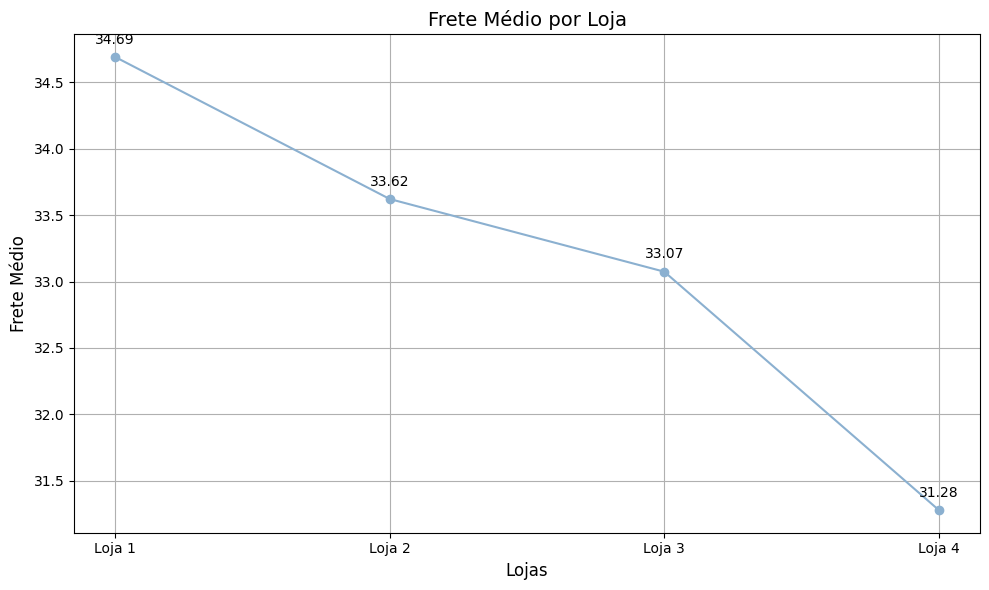

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(list(fretes.keys()), list(fretes.values()), marker='o', linestyle='-', color='#8BB0D0')

for i, (loja, valor) in enumerate(fretes.items()):
    ax.text(i, valor + 0.1, f"{round(valor, 2)}", ha='center', fontsize=10, color='black')

ax.set_title("Frete Médio por Loja", fontsize=14)
ax.set_ylabel("Frete Médio", fontsize=12)
ax.set_xlabel("Lojas", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


# Análise Comparativa das Lojas e Identificação da Melhor Candidata para Venda

Foi realizada uma análise comparativa entre as quatro lojas para identificar qual delas apresenta o menor desempenho financeiro e operacional e, portanto, seria a melhor candidata para venda.

## Faturamento

A Loja 4 apresenta o menor faturamento, totalizando **R\$ 1.384.497,58**, valor aproximadamente **R\$ 200 mil inferior** ao faturamento da Loja 3 e **R\$ 100 mil abaixo** da Loja 2. Essa diferença significativa evidencia o desempenho financeiro inferior da Loja 4.

## Avaliação dos Clientes

Embora a Loja 1 registre a pior avaliação média (**3,98**), a Loja 4 ocupa o terceiro lugar com avaliação razoável de **4,00**, ligeiramente abaixo das duas lojas líderes.

## Frete Médio

A Loja 4 se destaca por ter o menor valor médio de frete (**R\$ 31,28**), o que poderia representar uma vantagem competitiva. Em contraste, a Loja 1 apresenta o frete médio mais alto (**R\$ 34,69**).

## Desempenho por Categoria

A análise detalhada de vendas por produto revela que a Loja 4 possui volume significativamente inferior em categorias estratégicas, como:

- Micro-ondas (20 unidades vendidas, contra 60 na loja líder)
- Livros de programação

Não há evidências que indiquem um destaque da Loja 4 em nenhuma categoria específica.

## Conclusão

Apesar da avaliação razoável e do frete médio mais baixo, a Loja 4 apresenta baixo desempenho financeiro e operacional, refletido no menor faturamento e no fraco desempenho em produtos estratégicos. O frete competitivo não foi suficiente para impulsionar as vendas ou melhorar o faturamento.

Portanto, com base nos dados analisados, a Loja 4 é a melhor candidata para venda, pois demonstra:

- Faturamento **12,6% inferior** ao da Loja 1, evidenciando seu desempenho financeiro mais fraco;
- Desempenho inferior em produtos-chave para o negócio;
- Avaliação adequada, porém insuficiente para compensar os resultados financeiros negativos;
- Vantagem no custo do frete que não se traduziu em ganho competitivo efetivo.
